# **BreastCancerPredictor: ANN-Based Diagnostic Tool**

## **Project Overview**

**BreastCancerPredictor** is a binary classification project that predicts breast cancer diagnosis (malignant or benign) using features extracted from digitized images of fine needle aspirates (FNA) of breast masses.  
The solution includes data exploration, preprocessing, artificial neural network (ANN) modeling, and deployment via a Streamlit web application.

## **Objective**

Build and deploy an ANN model to accurately classify breast cancer cases based on 30 numerical diagnostic features.

## **Dataset**

- **Source**: [Breast Cancer Wisconsin Dataset](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)  
- **Samples**: 569  
- **Features**: 30 numerical features + diagnosis label (M/B)  
- **Target**: Diagnosis (Malignant = 1, Benign = 0)

## **Data Exploration & Preprocessing**

- Conducted **EDA** including visualizations, skewness check, and outlier detection.
- Applied **StandardScaler** to numerical features.
- Encoded target labels using **LabelEncoder**.
- Split data into training and testing sets.

## **Modeling & Evaluation**

- **Architecture**:  
  - Input layer matching feature count.  
  - Hidden layers: Dense(32) → Dense(256, ReLU) → Dropout(0.3) → Dense(32, ReLU)  
  - Output: Dense(1, Sigmoid) for binary classification.
- **Training**: EarlyStopping with patience=5, validation split=0.2, 35 epochs, batch size=10.
- **Optimizer**: Adam, **Loss**: Binary Crossentropy, **Metric**: Accuracy.

**Performance**:  
- **Training**: Accuracy = `0.9802`, Loss = `0.0513`  
- **Testing**: Accuracy = `0.9737`, Loss = `0.0848`  
- **Precision** = `0.98`, **Recall** = `0.97`, **F1-score** = `0.97`

## **Deployment**

Developed a **[Streamlit web app](https://breastcancerpredictor-dpjxeyvzje8xdjfbtvbjkh.streamlit.app/)** that allows users to input diagnostic measurements and receive real-time predictions (Malignant/Benign) with probability scores.

#### **Import Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input , Dense , Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, classification_report, confusion_matrix
import joblib
import warnings
warnings.filterwarnings('ignore')

#### **Dataset Loading**

In [2]:
df = pd.read_csv('data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


#### **Data Exploration and Visualization**

In [3]:
df['Unnamed: 32'].isna().sum()

569

In [4]:
df.drop('Unnamed: 32', axis=1, inplace=True)

In [5]:
df.drop('id', axis=1, inplace=True)

In [6]:
df.sample(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
355,B,12.56,19.07,81.92,485.8,0.08760,0.10380,0.103000,0.043910,0.1533,...,13.370,22.43,89.02,547.4,0.10960,0.20020,0.23880,0.09265,0.2121,0.07188
415,B,11.89,21.17,76.39,433.8,0.09773,0.08120,0.025550,0.021790,0.2019,...,13.050,27.21,85.09,522.9,0.14260,0.21870,0.11640,0.08263,0.3075,0.07351
510,B,11.74,14.69,76.31,426.0,0.08099,0.09661,0.067260,0.026390,0.1499,...,12.450,17.60,81.25,473.8,0.10730,0.27930,0.26900,0.10560,0.2604,0.09879
307,B,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,0.1788,...,9.699,20.07,60.90,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804
491,B,17.85,13.23,114.60,992.1,0.07838,0.06217,0.044450,0.041780,0.1220,...,19.820,18.42,127.10,1210.0,0.09862,0.09976,0.10480,0.08341,0.1783,0.05871
158,B,12.06,12.74,76.84,448.6,0.09311,0.05241,0.019720,0.019630,0.1590,...,13.140,18.41,84.08,532.8,0.12750,0.12320,0.08636,0.07025,0.2514,0.07898
219,M,19.53,32.47,128.00,1223.0,0.08420,0.11300,0.114500,0.066370,0.1428,...,27.900,45.41,180.20,2477.0,0.14080,0.40970,0.39950,0.16250,0.2713,0.07568
107,B,12.36,18.54,79.01,466.7,0.08477,0.06815,0.026430,0.019210,0.1602,...,13.290,27.49,85.56,544.1,0.11840,0.19630,0.19370,0.08442,0.2983,0.07185
253,M,17.30,17.08,113.00,928.2,0.10080,0.10410,0.126600,0.083530,0.1813,...,19.850,25.09,130.90,1222.0,0.14160,0.24050,0.33780,0.18570,0.3138,0.08113
466,B,13.14,20.74,85.98,536.9,0.08675,0.10890,0.108500,0.035100,0.1562,...,14.800,25.46,100.90,689.1,0.13510,0.35490,0.45040,0.11810,0.2563,0.08174


In [7]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
df.duplicated().sum()

0

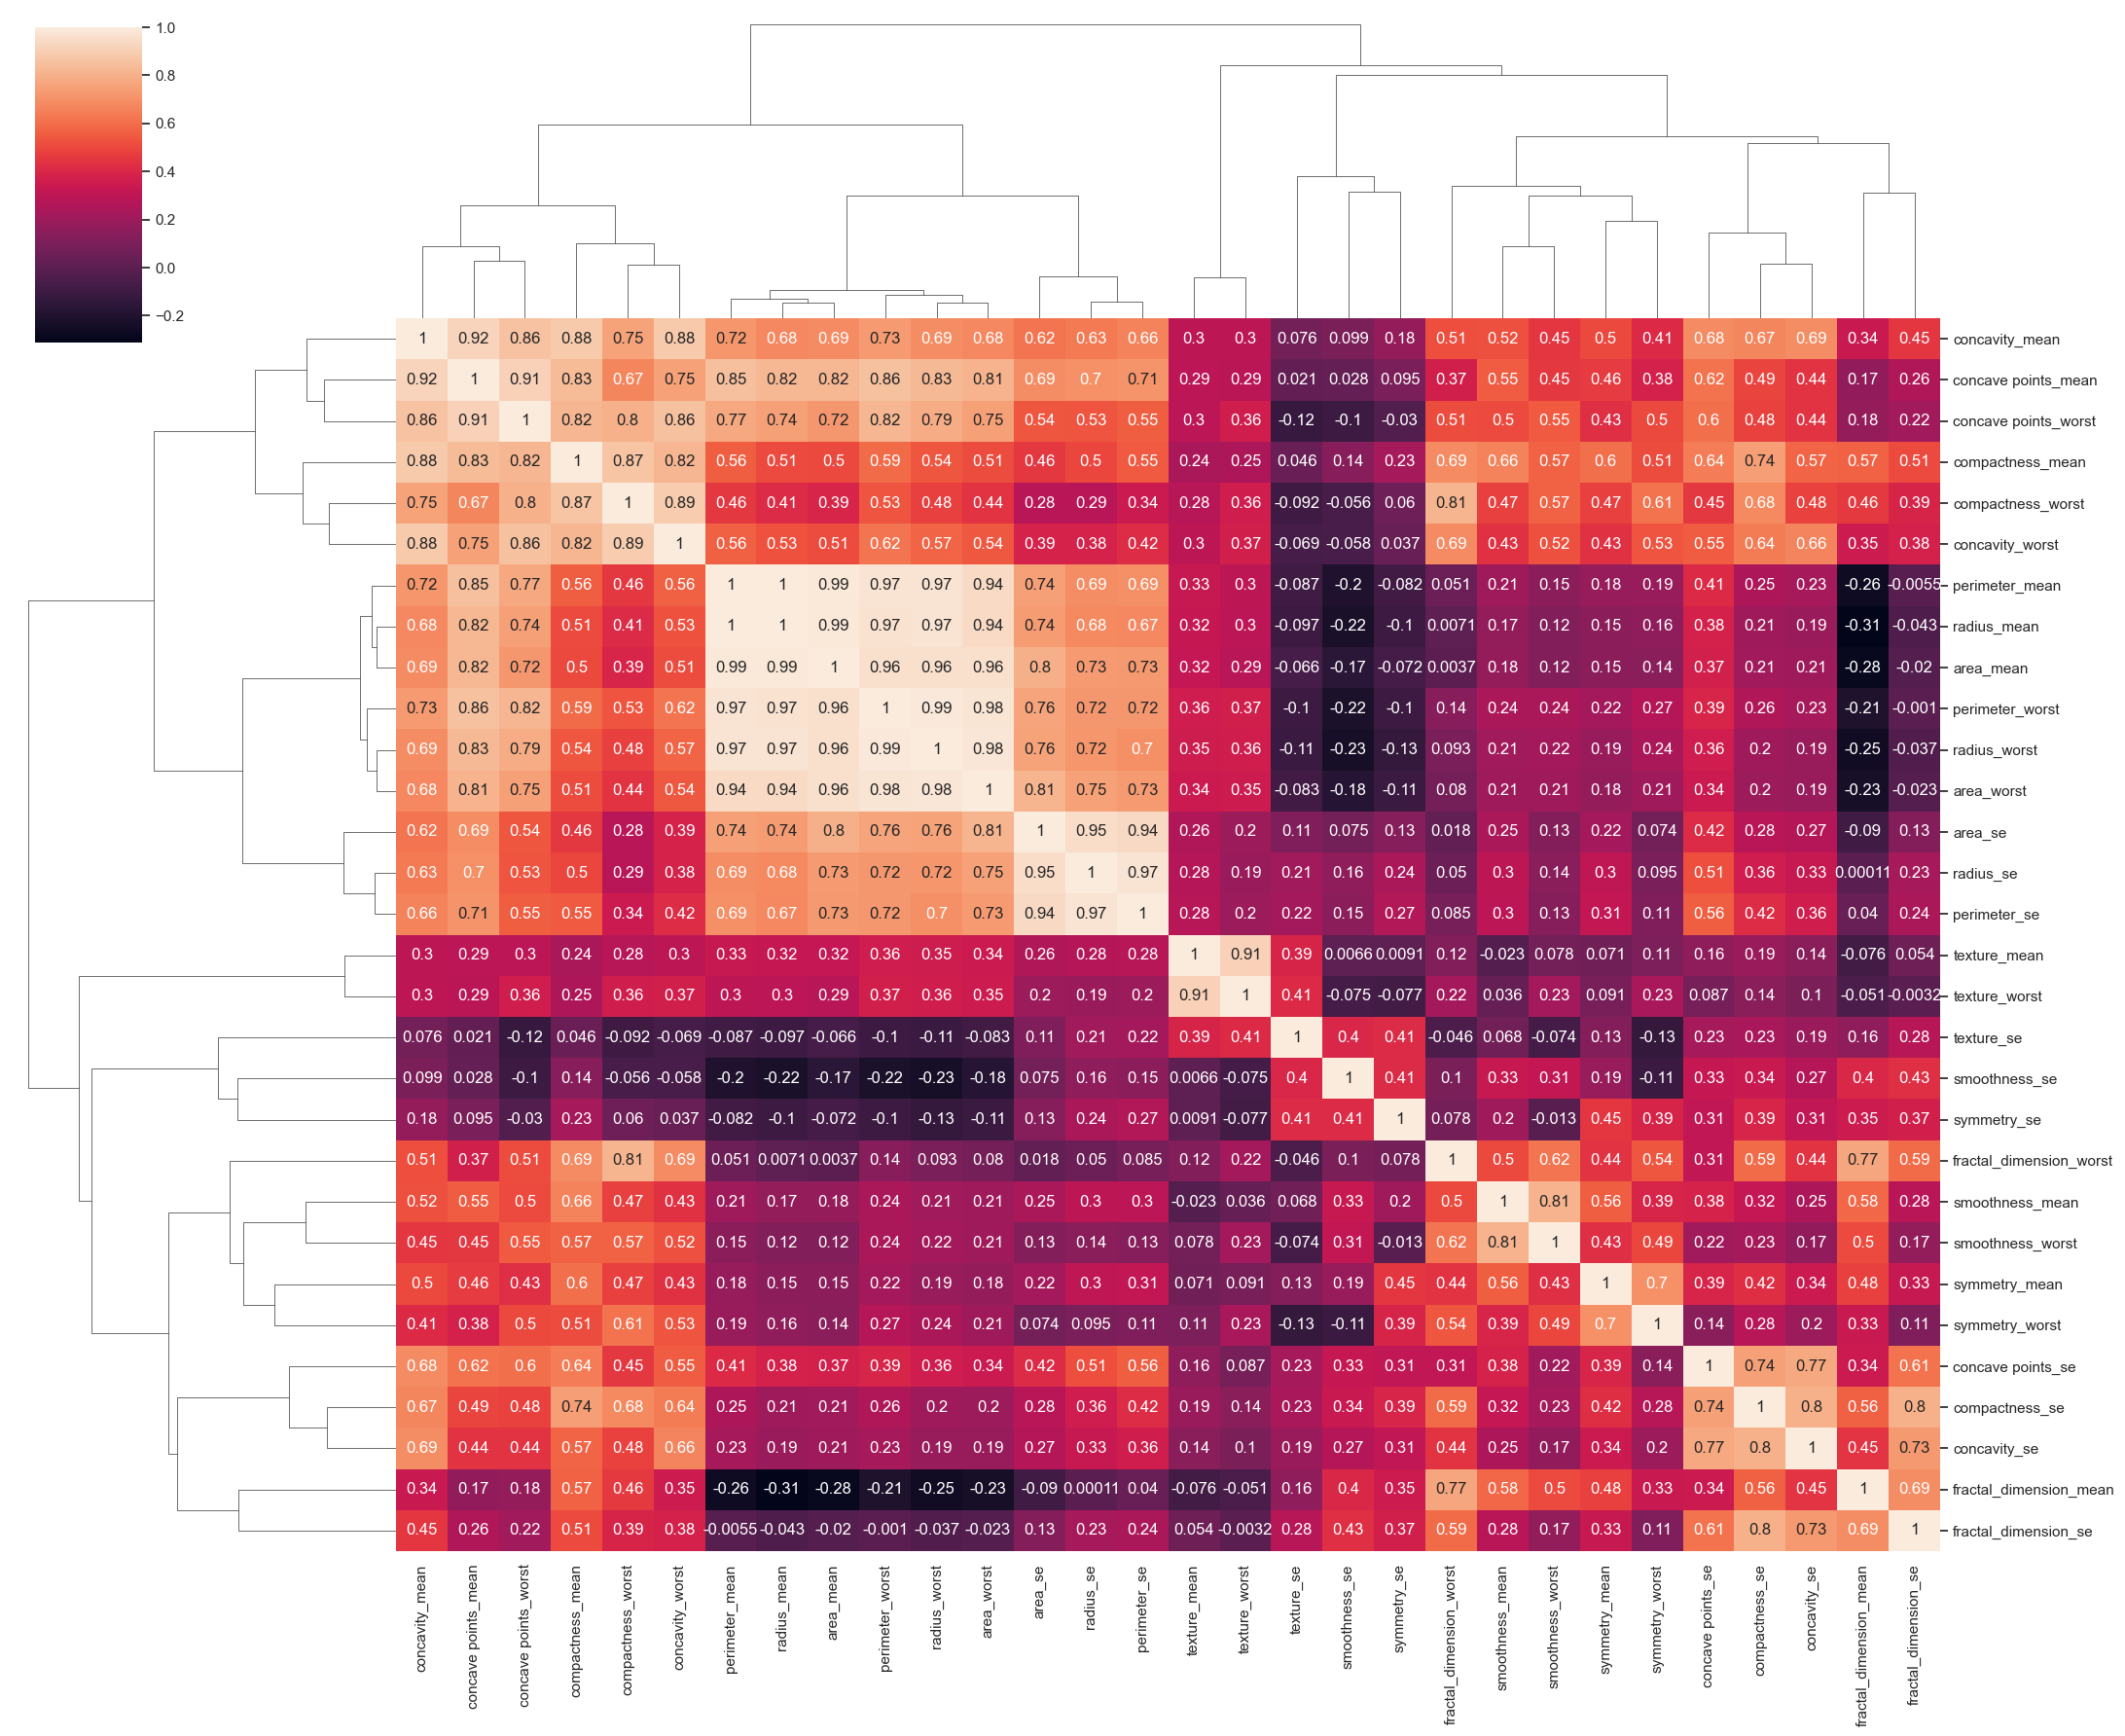

In [12]:
sns.clustermap(df.corr(numeric_only=True), annot=True, figsize=(22, 18))
plt.show()

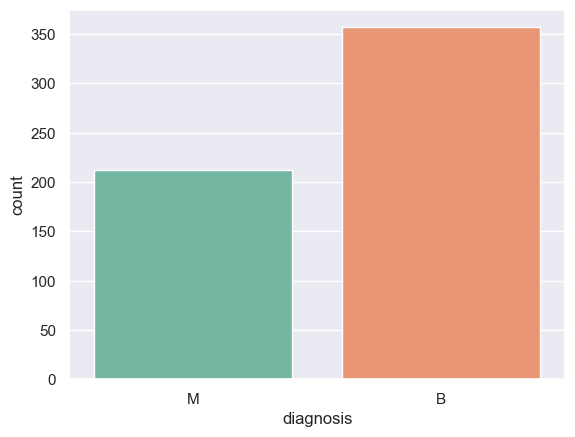

In [13]:
sns.countplot(data = df, x='diagnosis', palette='Set2')
plt.show()

In [13]:
df.skew(numeric_only=True)

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

> Several features showed high skewness (e.g., `area_se` = 5.45, `concavity_se` = 5.11).  
> As the **ANN model** demonstrated **stable performance without transformation**, skewness correction was deemed unnecessary.  
> **Decision:** Retained original feature distribution.

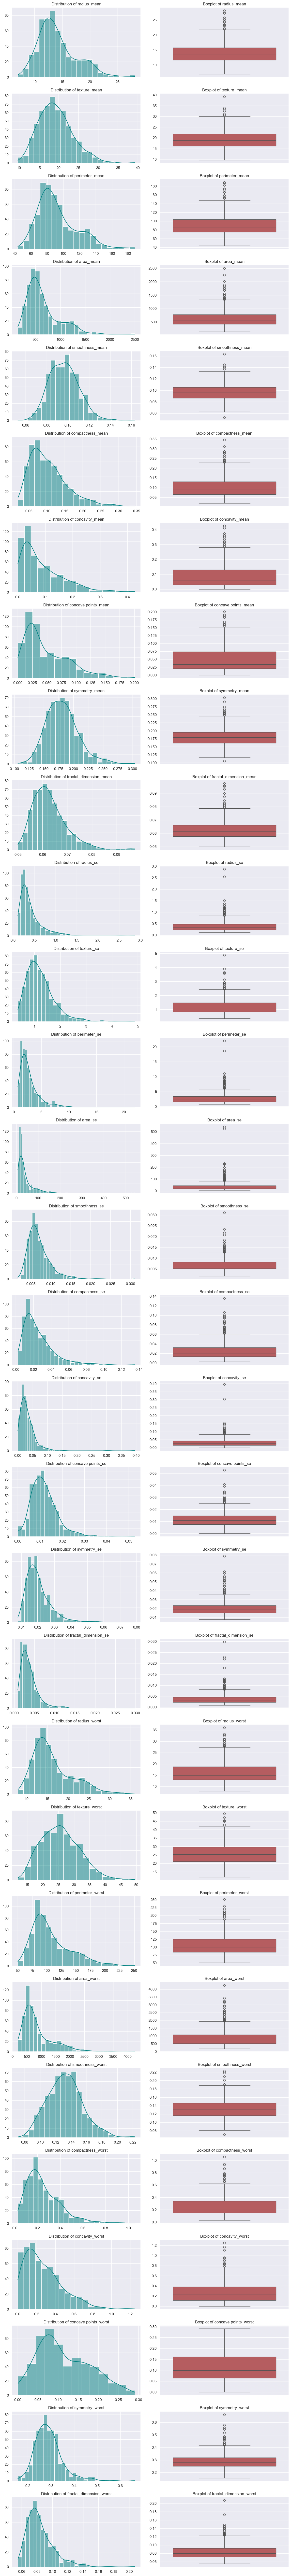

In [14]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

plt.figure(figsize=(12, len(features) * 3.5))

for i, col in enumerate(features):
    plt.subplot(len(features), 2, i * 2 + 1)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f"Distribution of {col}")
    plt.xlabel('')  
    plt.ylabel('')

    plt.subplot(len(features), 2, i * 2 + 2)
    sns.boxplot(y=df[col], color='r')
    plt.title(f"Boxplot of {col}")
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

C:\Users\OMEN\AppData\Local\Temp\ipykernel_7384\870991975.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outlier_df.index, y='Outlier Percentage', data=outlier_df, palette="Set3")


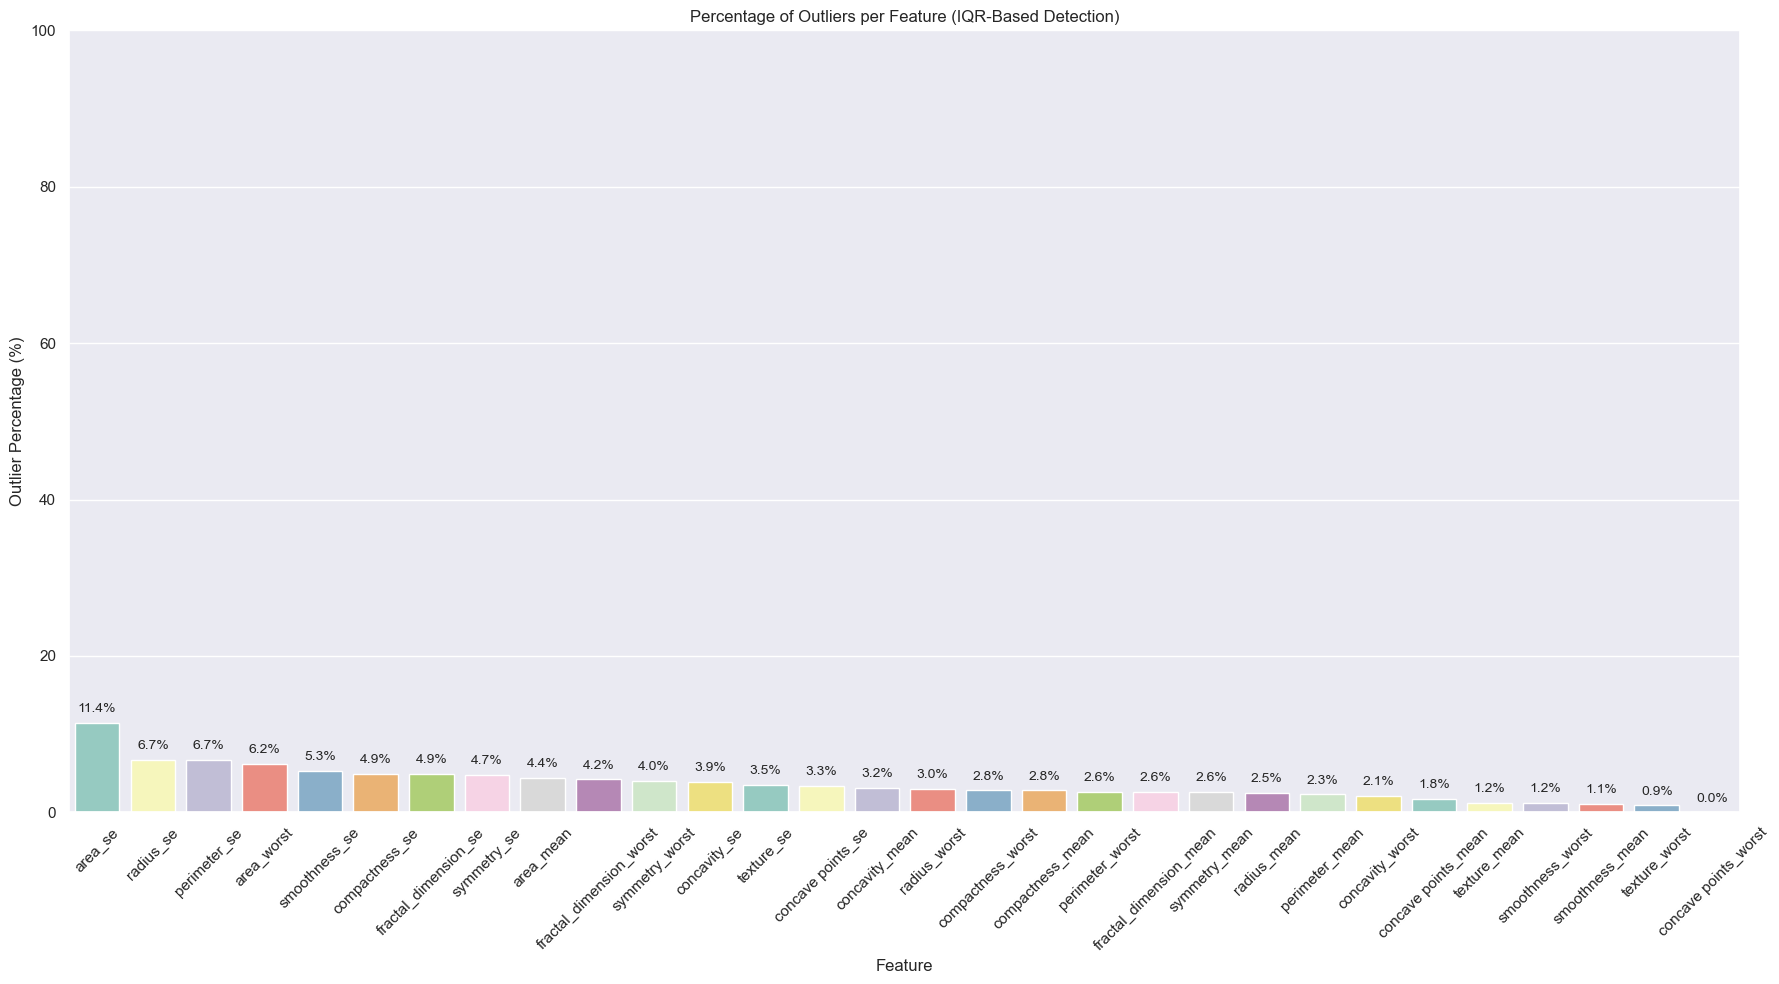

In [15]:
outlier_percentages = {}

for col in features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_percent = (len(outliers) / len(df)) * 100
    outlier_percentages[col] = outlier_percent

outlier_df = pd.DataFrame.from_dict(outlier_percentages, orient='index', columns=['Outlier Percentage'])
outlier_df = outlier_df.sort_values('Outlier Percentage', ascending=False)

plt.figure(figsize=(18, 10))
sns.barplot(x=outlier_df.index, y='Outlier Percentage', data=outlier_df, palette="Set3")
plt.title("Percentage of Outliers per Feature (IQR-Based Detection)")
plt.ylabel("Outlier Percentage (%)")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.ylim(0, 100)

for i, value in enumerate(outlier_df['Outlier Percentage']):
    plt.text(i, value + 1, f"{value:.1f}%", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [16]:
outlier_df

,Outlier Percentage
area_se,11.423550
radius_se,6.678383
perimeter_se,6.678383
area_worst,6.151142
smoothness_se,5.272408
compactness_se,4.920914
fractal_dimension_se,4.920914
symmetry_se,4.745167
area_mean,4.393673
fractal_dimension_worst,4.217926


In [17]:
outlier_df[['Outlier Percentage']].mean()

Outlier Percentage    3.561804
dtype: float64

C:\Users\OMEN\AppData\Local\Temp\ipykernel_7384\413603314.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outlier_count_distribution.index, y=outlier_count_distribution.values, palette="Set3")


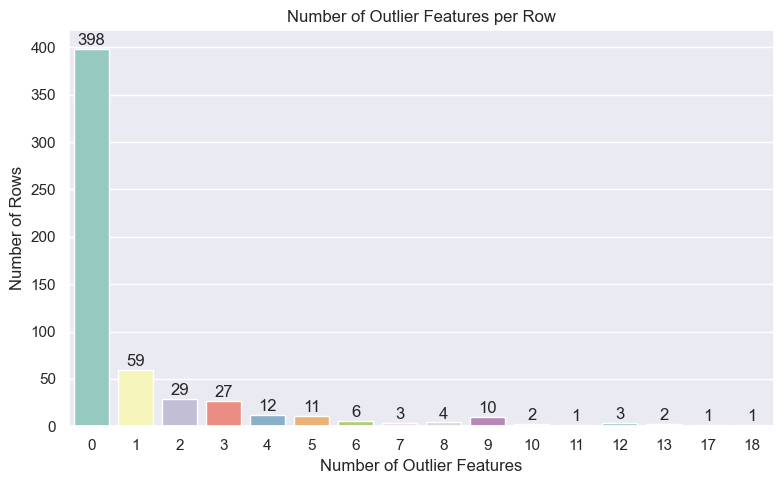

In [18]:
outlier_flags = pd.DataFrame(index=df.index)

for col in features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_flags[col] = ((df[col] < lower) | (df[col] > upper)).astype(int)

outlier_flags["Outlier Count"] = outlier_flags.sum(axis=1)

outlier_count_distribution = outlier_flags["Outlier Count"].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=outlier_count_distribution.index, y=outlier_count_distribution.values, palette="Set3")
plt.title("Number of Outlier Features per Row")
plt.xlabel("Number of Outlier Features")
plt.ylabel("Number of Rows")

for i, val in enumerate(outlier_count_distribution.values):
    plt.text(i, val + 1, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [19]:
outlier_flags['Outlier Count'].value_counts()

Outlier Count
0     398
1      59
2      29
3      27
4      12
5      11
9      10
6       6
8       4
12      3
7       3
10      2
13      2
11      1
17      1
18      1
Name: count, dtype: int64

> Outlier percentages per feature ranged from 0% to 11.42% (e.g., `area_se` = 11.42%, `radius_se` = 6.68%).  
> Model performance was strong, and standardization mitigated the impact of outliers.  
> **Decision:** Retained all data to preserve variability.

#### **Split Features and Target**

In [20]:
X = df.drop('diagnosis', axis=1).copy()
y = df['diagnosis'].copy()

In [21]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [22]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [23]:
y.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

#### **Splitting Data into Training and Testing Sets**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
print('X_train shape is: ', X_train.shape)
print('X_test shape is: ', X_test.shape)
print('y_train shape is: ', y_train.shape)
print('y_test shape is: ', y_test.shape)

X_train shape is:  (455, 30)
X_test shape is:  (114, 30)
y_train shape is:  (455,)
y_test shape is:  (114,)


### **Data Preprocessing**

#### **Feature Scaling using StandardScaler**

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [27]:
X_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [28]:
X_test = scaler.transform(X_test)

In [29]:
X_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,
         0.20317063, -0.15406178],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,
         0.26991966, -0.27320074],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,
        -1.15564888,  0.11231497]])

#### **Label Encoding the Target Variable**

In [30]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test) 

In [31]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,

In [32]:
y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

### **Artificial Neural Network (ANN)**

In [33]:
model = Sequential()
model.add(Input(shape=(X.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [34]:
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [35]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │           8,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,697 (69.13 KB)

 Trainable params: 17,697 (69.13 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model.fit(X_train, y_train, epochs=35, batch_size=10, verbose=1, validation_split=0.2, callbacks=[es])

Epoch 1/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8548 - loss: 0.4755 - val_accuracy: 0.9451 - val_loss: 0.1247
Epoch 2/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9598 - loss: 0.1233 - val_accuracy: 0.9780 - val_loss: 0.0732
Epoch 3/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9768 - loss: 0.0861 - val_accuracy: 0.9780 - val_loss: 0.0602
Epoch 4/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9840 - loss: 0.0501 - val_accuracy: 0.9560 - val_loss: 0.0617
Epoch 5/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9799 - loss: 0.0705 - val_accuracy: 0.9890 - val_loss: 0.0524
Epoch 6/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9717 - loss: 0.0556 - val_accuracy: 0.9780 - val_loss: 0.0468
Epoch 7/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9876 - loss: 0.0431 - val_accuracy: 0.9451 - val_loss: 0.0713
Epoch 8/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9900 - loss: 0.0269 - val_accuracy: 0.9890 - val_loss:

#### **Model Evalution**

In [37]:
trainLoss, trainAccuracy = model.evaluate(X_train, y_train)
print('Training Loss is', trainLoss)
print('Training Accuracy is', trainAccuracy)
testLoss, testAccuracy = model.evaluate(X_test, y_test)
print('Testing Loss is', testLoss)
print('Testing Accuracy is', testAccuracy)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9850 - loss: 0.0429 
Training Loss is 0.05128839239478111
Training Accuracy is 0.9802197813987732
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9874 - loss: 0.0529 
Testing Loss is 0.08476942777633667
Testing Accuracy is 0.9736841917037964


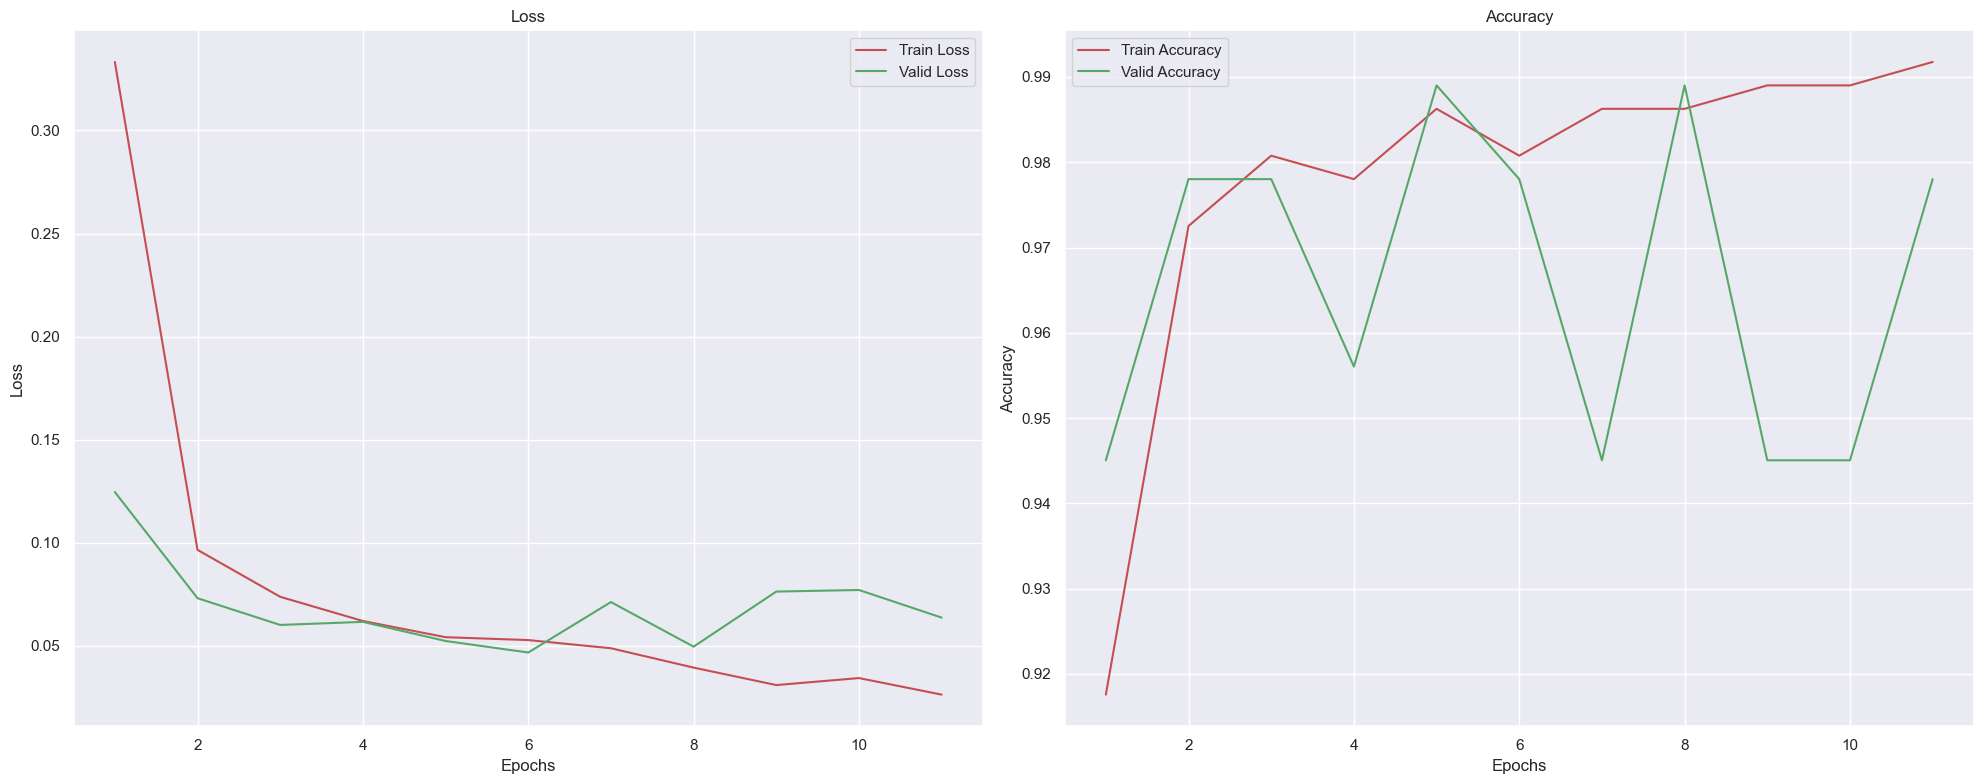

In [38]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [39]:
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [40]:
y_pred

array([[9.9869937e-01],
       [5.7337312e-03],
       [5.1019300e-04],
       [2.3301942e-03],
       [2.1630694e-04],
       [3.0922654e-04],
       [2.4662479e-05],
       [1.3729924e-04],
       [1.8107725e-08],
       [2.1630046e-06],
       [2.9247761e-01],
       [9.2948563e-03],
       [1.0851007e-07],
       [3.3332479e-01],
       [2.1359344e-01],
       [9.9886048e-01],
       [4.0342577e-05],
       [9.9997908e-01],
       [9.9987876e-01],
       [9.9999976e-01],
       [9.9909794e-01],
       [9.9693620e-01],
       [7.2861440e-04],
       [9.0720707e-05],
       [9.9984181e-01],
       [5.2558008e-04],
       [4.9067985e-06],
       [9.9719048e-01],
       [3.9578907e-04],
       [9.9999648e-01],
       [3.2288630e-05],
       [9.9961305e-01],
       [1.8442746e-01],
       [9.9762678e-01],
       [2.3727909e-08],
       [9.9940735e-01],
       [3.1834047e-03],
       [9.9443376e-01],
       [4.6733106e-03],
       [9.9854213e-01],
       [8.9557046e-01],
       [9.777719

In [41]:
y_pred = [np.round(i[0]) for i in y_pred]
y_pred[:10]

[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [42]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is \n', CM)

Confusion Matrix is 
 [[67  0]
 [ 3 44]]


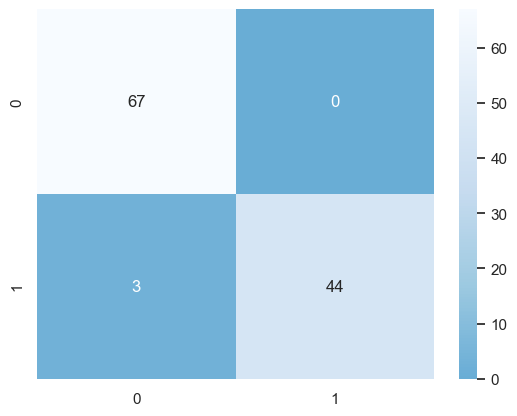

In [43]:
sns.heatmap(CM, center=True, cmap='Blues_r', annot=True)
plt.show()

In [44]:
ClassificationReport = classification_report(y_test, y_pred)
print('Classification Report is: \n', ClassificationReport)

Classification Report is: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        67
           1       1.00      0.94      0.97        47

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



#### **Export Model and Preprocessing Pipeline**

In [55]:
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(model, 'ann_model.pkl')

['ann_model.pkl']

## **Final Thoughts**

This project demonstrated the use of an Artificial Neural Network for binary classification in a medical diagnosis context, using the Breast Cancer Wisconsin dataset.  
Through careful data exploration, preprocessing, and model design, the ANN achieved high predictive performance, with strong precision, recall, and F1-scores—indicating reliable detection of both malignant and benign cases.

The deployment of the trained model as a Streamlit application enables accessible, real-time predictions based on user-provided diagnostic measurements, bridging the gap between data science and practical healthcare decision support.

---

**Thank you for exploring this project.**